In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'D:\Term7\Intelligent Systems\hw\hw1\train.csv')

df=df[df['label'].isin([2, 7]) ]
df['label'].mask(df['label'] == 2, -1, inplace=True)
df['label'].mask(df['label'] == 7, 1, inplace=True)
# df=df.iloc[np.random.permutation(len(df))]
df_test=df.iloc[0:int(np.ceil(0.1*len(df)))]
df_train=df.iloc[int(np.ceil(0.1*len(df))):len(df)]
df.head()


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
6       1       0       0       0       0       0       0       0       0   
16     -1       0       0       0       0       0       0       0       0   
18      1       0       0       0       0       0       0       0       0   
22     -1       0       0       0       0       0       0       0       0   
24     -1       0       0       0       0       0       0       0       0   

    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
6        0  ...         0         0         0         0         0         0   
16       0  ...         0         0         0         0         0         0   
18       0  ...         0         0         0         0         0         0   
22       0  ...         0         0         0         0         0         0   
24       0  ...         0         0         0         0         0         0   

    pixel780  pixel781  pixel782  pixel783  
6          0         0         0         0  
16         0         0         0         0  
18         0         0         0         0  
22         0         0         0         0  
24         0         0         0         0  

[5 rows x 785 columns]

In [3]:
df_y_train=df_train["label"]
df_x_train=df_train.drop("label",inplace=False, axis=1)
df_y_test=df_test["label"]
df_x_test=df_test.drop("label",inplace=False, axis=1)


In [4]:
y_train=np.array(df_y_train)
x_train=np.array(df_x_train)
x_train=x_train/np.max(x_train)
y_test=np.array(df_y_test)
x_test=np.array(df_x_test)
x_test=x_test/np.max(x_test)

**A)**

we create a function called "cost_func" that calculates the cost function


In [5]:
def cost_func(x,y,w,b):
    n=len(x)
    j=0
    for i in range(n):
        j=j + np.log(1+np.exp(-y[i] *(b + np.dot(x[i], w))))
    cost=j/n
    return cost

we create a function called "calc_dw" that calculates the derivative of cost function (J) with respect to the weights (w)

In [6]:
def calc_dw(x, y, w, b):
    n=len(x)
    dw=0
    for i in range(n):
        c= -y[i] * x[i] * np.exp(-y[i]*(b+np.dot(x[i], w))) / (1 + np.exp(-y[i]*(b+np.dot(x[i], w))))
        dw=dw +c
    dw=dw/n
    return dw
    

we create a function called "calc_db" that calculates the derivative of cost function (J) with respect to the bias (b)

In [7]:
def calc_db(x, y,w,b):
    n=len(x)
    db=0
    for i in range(n):
        c= -y[i] * np.exp(-y[i]*(b+np.dot(x[i], w))) / (1 + np.exp(-y[i]*(b + np.dot(x[i], w))))
        db= db +c
    db=db/n
    return db

we create a function called "train" that first initializes the weights(w) and bais(b). in each epoch, calculates the cost function of
train and test data, and updates w and b using only the train data

In [8]:
def train(x_train, y_train, epoch, alpha, x_test, y_test, w, b):
    costs_train=[]
    costs_test=[]
    for i in range(epoch):
        j_train=cost_func(x_train, y_train, w, b)       
        costs_train.append(j_train)
        j_test=cost_func(x_test, y_test, w, b)
        costs_test.append(j_test)
        # updating w and b
        w= w - alpha * calc_dw(x_train, y_train, w, b)
        b= b - alpha * calc_db(x_train, y_train, w, b)
    return [w, b, costs_train, costs_test]

In [9]:
lrs=[0.01,0.1,1]
w_all=[]
b_all=[]
epoch=100
j_train_all=[]
j_test_all=[]
for alpha in lrs:
    w=np.zeros(x_train.shape[1])
    b=0
    w, b, costs_train, costs_test= train(x_train, y_train, epoch, alpha, x_test, y_test, w, b)
    w_all.append(w)
    b_all.append(b)
    j_train_all.append(costs_train)
    j_test_all.append(costs_test)

In [10]:

for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_train_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of train data on each epoch')
plt.ylabel('J(w,b)')

Text(0, 0.5, 'J(w,b)')

as we can see in 100 epochs, the model with learning rate alpha=1 and alpha=0.1 are fit on the train data but the model with alpha=0.01 needs more epochs becouse the learning rate is too small. also the model with alpha=1 has learned the fastes and has the least error

Text(0, 0.5, 'J(w,b)')

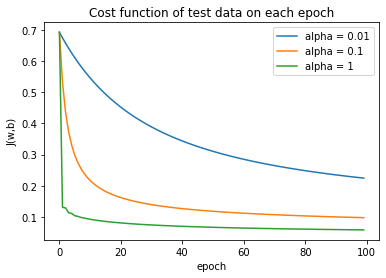

In [13]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_test_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of test data on each epoch')
plt.ylabel('J(w,b)')

as we can see in 100 epochs, the model with learning rate alpha=1 and alpha=0.1 have small error on test data too but the model with alpha=0.01 can't predict the test data and has big errors. 


the model with alpha=1 has the least erreo on both train and test data. it also converges the fastes.
the model with alpha=0.1 also has good performance on both train and test data.
the model with alpha=1 needs more epochs to learn and has big errors.

**B)**

we create a function called predict that uses the w and b to prdict the label(y_hat)

In [23]:
def predict(x,w,b):
    y_hat=[]
    n=len(x)
    for i in range(n):
        p= np.dot(w, x[i]) + b 
        if p>=0:
            y_hat.append(1)
        else:
            y_hat.append(-1)
        
    return y_hat

we create a function called "calc_accuracy" that calculates how many labels are predicted correctly

In [24]:
def calc_accuracy(y,y_hat):
    n=len(y)
    n_true=0
    for i in range(n):
        if y_hat[i]==y[i]:
            n_true= n_true + 1
    accur=n_true/n
    return accur*100

In [81]:
for i in range(len(lrs)):
    y_hat_train=predict(x_train,w_all[i],b_all[i])
    accur_train=calc_accuracy(y_train,y_hat_train)
    y_hat_test=predict(x_test,w_all[i],b_all[i])
    accur_test=calc_accuracy(y_test,y_hat_test)
    print("Accuracy model with alpha= "+ str(lrs[i]))
    print("on train data: "+ str(accur_train))
    print("on test data: "+ str(accur_test))
    print("")


Accuracy model with alpha= 0.01
on train data: 96.51554404145077
on test data: 95.92074592074592

Accuracy model with alpha= 0.1
on train data: 97.34455958549223
on test data: 96.96969696969697

Accuracy model with alpha= 1
on train data: 98.48445595854922
on test data: 98.13519813519814



As we can see all models have good accuracy on both test and train data

**C)**

we create a function called "train_on_batch". this function first shuffles the train data and labels in unision, then splits them into batches with the given batch size. it trains the model on each batch.

In [17]:
def train_on_batch(x_train,y_train,batch_size, alpha, x_test, y_test, w, b):
    n=len(y_train)
    num_batch=int(np.ceil(n/batch_size))
    shuffler = np.random.permutation(n)
    x_shuffled = x_train[shuffler]
    y_shuffled = y_train[shuffler]
    train_cost_all_batch=[]
    test_cost_all_batch=[]
    for i in range(num_batch):
        start=i*batch_size
        end=min((i+1)*batch_size,n-1)
        x_batch=x_shuffled[start:end]
        y_batch=y_shuffled[start:end]
        [w, b, costs_train, costs_test]=train(x_batch, y_batch, 1, alpha, x_test, y_test, w, b)
        train_cost_all_batch.append(costs_train[0])
        test_cost_all_batch.append(costs_test[0])
    return [w, b, train_cost_all_batch, test_cost_all_batch]

In [15]:
def train_batch_on_epochs(epoch,x_train,y_train,batch_size, alpha, x_test, y_test, w, b):
    train_cost_all=[]
    test_cost_all=[]
    for i in range(epoch):
        [w, b, train_cost_all_batch, test_cost_all_batch]=train_on_batch(x_train,y_train,batch_size,
                                                                         alpha, x_test, y_test, w, b)
        train_cost_all.append(train_cost_all)
        test_cost_all.append(test_cost_all)
    return [w, b, train_cost_all, test_cost_all]
        

**batch size=100**

In [ ]:
lrs=[0.01,0.1,1]
w_all=[]
b_all=[]
batch_size=100
epoch=50
j_train_all=[]
j_test_all=[]
for alpha in lrs:
    w=np.zeros(x_train.shape[1])
    b=0
    w, b, costs_train, costs_test= train_batch_on_epochs(epoch,x_train, y_train, batch_size, alpha, x_test, y_test, w, b)
    w_all.append(w)
    b_all.append(b)
    costs_train=np.ndarray.flatten(np.array(costs_train))
    costs_test=np.ndarray.flatten(np.array(costs_test))
    j_train_all.append(costs_train)
    j_test_all.append(costs_test)


Text(0, 0.5, 'J(w,b)')

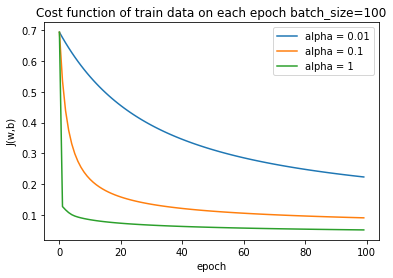

In [12]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_train_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of train data on each epoch batch_size=100')
plt.ylabel('J(w,b)')

we can see that the results are the same but the plot has some telorance becouse we used stochastic gradiant

Text(0, 0.5, 'J(w,b)')

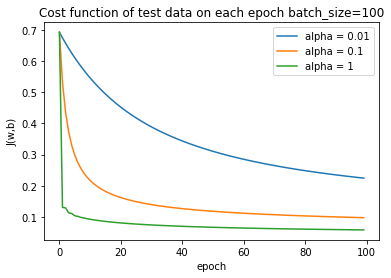

In [15]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_test_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of test data on each epoch epoch batch_size=100')
plt.ylabel('J(w,b)')

In [25]:
for i in range(len(lrs)):
    y_hat_train=predict(x_train,w_all[i],b_all[i])
    accur_train=calc_accuracy(y_train,y_hat_train)
    y_hat_test=predict(x_test,w_all[i],b_all[i])
    accur_test=calc_accuracy(y_test,y_hat_test)
    print("Accuracy model with alpha= "+ str(lrs[i]))
    print("on train data: "+ str(accur_train))
    print("on test data: "+ str(accur_test))
    print("")

Accuracy model with alpha= 0.01
on train data: 96.51554404145077
on test data: 95.92074592074592

Accuracy model with alpha= 0.1
on train data: 97.34455958549223
on test data: 96.96969696969697

Accuracy model with alpha= 1
on train data: 98.48445595854922
on test data: 98.13519813519814



we can see that the results are very similar to part b

**batch size=1**

we can see that the results are the same but the plot has some telorance becouse we used stochastic gradiant

In [ ]:
lrs=[0.01,0.1,1]
w_all=[]
b_all=[]
batch_size=1
epoch=50
j_train_all=[]
j_test_all=[]
for alpha in lrs:
    w=np.zeros(x_train.shape[1])
    b=0
    w, b, costs_train, costs_test= train_batch_on_epochs(epoch,x_train, y_train, batch_size, alpha, x_test, y_test, w, b)
    w_all.append(w)
    b_all.append(b)
    costs_train=np.ndarray.flatten(np.array(costs_train))
    costs_test=np.ndarray.flatten(np.array(costs_test))
    j_train_all.append(costs_train)
    j_test_all.append(costs_test)


In [ ]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_test_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of test data on each epoch epoch batch_size=100')
plt.ylabel('J(w,b)')

In [18]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_train_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of train data on each epoch batch_size=1')
plt.ylabel('J(w,b)')

Text(0, 0.5, 'J(w,b)')

we get the almost same results but it has even more telorance becouse the batch size is very small

Text(0, 0.5, 'J(w,b)')

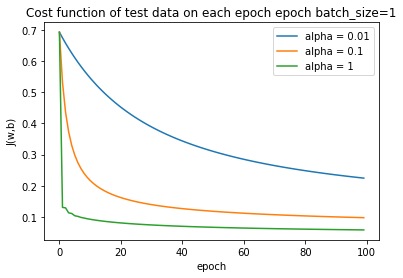

In [21]:
for i in range(len(lrs)):
    plt.plot(np.arange(epoch),j_test_all[i])

plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"])
plt.xlabel('epoch')
plt.title('Cost function of test data on each epoch epoch batch_size=1')
plt.ylabel('J(w,b)')

we get almost same results but it has even more telorance becouse the batch size is very small

In [27]:
for i in range(len(lrs)):
    y_hat_train=predict(x_train,w_all[i],b_all[i])
    accur_train=calc_accuracy(y_train,y_hat_train)
    y_hat_test=predict(x_test,w_all[i],b_all[i])
    accur_test=calc_accuracy(y_test,y_hat_test)
    print("Accuracy model with alpha= "+ str(lrs[i]))
    print("on train data: "+ str(accur_train))
    print("on test data: "+ str(accur_test))
    print("")

Accuracy model with alpha= 0.01
on train data: 96.51554404145077
on test data: 95.92074592074592

Accuracy model with alpha= 0.1
on train data: 97.34455958549223
on test data: 96.96969696969697

Accuracy model with alpha= 1
on train data: 98.48445595854922
on test data: 98.13519813519814



we can see that the results are very similar to part b